[hd_mat] Using perplexity to compute n_neighbors.
Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
[HDEO] Received iterable as input. It should have len=2 and contain (D=None, V=None)
[hd_mat] This method returns the tuple (D, V). 
[hd_mat] Warning: There is nothing to do with given parameters. Returning given D and V
Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent: 100%|██████████| 250/250 [00:01<00:00, 165.85it/s]


Running Gradient Descent, Verbosity: True
[gradient_descent] Warning: because of logging, the cf will be computed at every iteration


Gradient Descent: 100%|██████████| 750/750 [00:04<00:00, 159.40it/s]


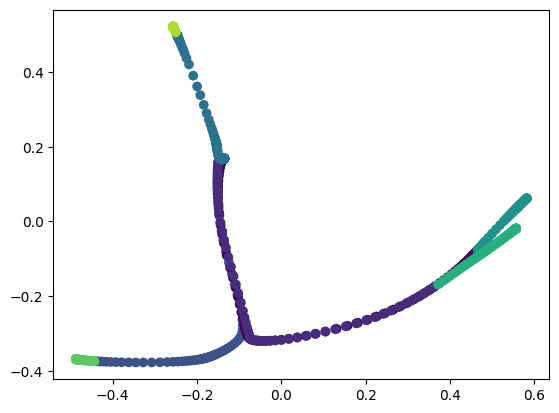

In [15]:
from matplotlib import pyplot as plt
from hyperbolicTSNE import load_data, Datasets, SequentialOptimizer, initialization, HDEO, PoincareDiskModel

data_home = "../datasets"

seed = 42
dataX, dataY, D, V = load_data(Datasets.MYELOID, data_home=data_home, random_state=seed, to_return="X_labels_D_V", hd_params={"perplexity": 30})

opt_params = SequentialOptimizer.sequence_poincare(PoincareDiskModel,
                                                   gradientDescent_its=750,
                                                   learning_rate=.8,
                                                   vanilla=True,
                                                   exact=False)

X_embedded = initialization(n_samples=dataX.shape[0],
                            n_components=2,
                            X=dataX,
                            random_state=seed,
                            method="pca")

# Start: logging
logging_dict = {}
opt_params["logging_dict"] = logging_dict
# End: logging

hdeo_so = HDEO(init=X_embedded, n_components=2, metric="precomputed", verbose=True, opt_method=SequentialOptimizer, opt_params=opt_params)
res_hdeo_so = hdeo_so.fit_transform((D, V))
plt.scatter(res_hdeo_so.reshape(-1, 2)[:, 0], res_hdeo_so.reshape(-1, 2)[:, 1], c=dataY)
plt.show()